In [ ]:
# Install necessary libraries for transformers, torch, and sentence-transformers
!pip install --upgrade transformers torch sentence-transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 434.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━ 612.4/906.4 MB 37.9 MB/s eta 0:00:08
ERROR: Operation cancelled by user


In [ ]:
# Import required libraries
from tqdm import tqdm  # For progress bar in loops
from google.colab import drive  # For mounting Google Drive to access files
import pandas as pd  # For handling data in DataFrames
from IPython.display import display  # For displaying DataFrames in Jupyter Notebooks
from google.colab import drive  # Google Drive import again to ensure it's available

# Mount Google Drive to access the dataset stored in Google Drive
drive.mount('/content/drive')

# Define the path to the CSV file containing the data in your Google Drive
csv_file_path = '/content/drive/MyDrive/Colab Notebooks/data/processed/random_selected_articles_summaries_gpt.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing necessary libraries for model loading and semantic similarity calculation
import torch
from transformers import BartTokenizer, BartForConditionalGeneration  # BART model for summarization
from sentence_transformers import SentenceTransformer, util  # SentenceTransformer for semantic similarity

# Load the BART model and tokenizer for text summarization
bart_model_name = "facebook/bart-large-cnn"
tokenizer = BartTokenizer.from_pretrained(bart_model_name)  # Tokenizer to prepare text for the BART model
model = BartForConditionalGeneration.from_pretrained(bart_model_name)  # The BART model used for generating summaries

# Load the SentenceTransformer model for calculating semantic similarity
similarity_model = SentenceTransformer('all-MiniLM-L6-v2')  # Pre-trained model for computing sentence embeddings


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# Define a function to calculate the similarity score between an article and its summary
def calculate_similarity(article, summary):
    """
    This function calculates the cosine similarity between an article and its provided summary.
    
    Parameters:
    - article (str): The text of the article.
    - summary (str): The summary text.
    
    Returns:
    - float: The cosine similarity score between the article and the summary.
    """
    # Compute embeddings for both the article and the summary using SentenceTransformer
    embeddings = similarity_model.encode([article, summary])

    # Calculate cosine similarity between the two embeddings
    cosine_similarity = util.cos_sim(embeddings[0], embeddings[1])
    
    return cosine_similarity.item()  # Return the similarity score as a float

# Initialize a list to store the results (summary and similarity score)
results = []

# Loop through each row of the DataFrame, calculate similarity for the articles and summaries
for _, row in tqdm(df.iterrows()):  # tqdm to display a progress bar while processing
    article = row['cleaned_article']  # Extract the cleaned article text
    summary = row['summary']  # Extract the corresponding summary text

    # Calculate the similarity score for the current article and summary
    similarity_score = calculate_similarity(article, summary)

    # Append the results to the list
    results.append({
        "Provided Summary": summary,  # The provided summary text
        "Similarity Score": similarity_score  # The calculated similarity score
    })

# Convert the results list into a DataFrame for better display and analysis
results_df = pd.DataFrame(results)

# Print the results in tabular format
print(results_df)

# Display the DataFrame in the notebook
display(results_df)

293it [01:58,  2.47it/s]

                                      Provided Summary  Similarity Score
0    Poland’s recent near-total abortion ban has dr...          0.690621
1    In his message for Pro-Life Day 2020, Cardinal...          0.549866
2    Sex education in the Philippines is aimed at e...          0.877565
3    Jillaine St. Michel, a 37-year-old Idaho resid...          0.528554
4    The policy brief from Action Canada for Sexual...          0.833866
..                                                 ...               ...
288  Pueblo City Council’s recent decision to indef...          0.797928
289  Pueblo City Council’s recent decision to indef...          0.960047
290  Following the Supreme Court’s overturning of R...          0.652022
291  Indiana’s six abortion clinics have ceased per...          0.453636
292  A University of Nottingham midwifery student, ...          0.693066

[293 rows x 2 columns]


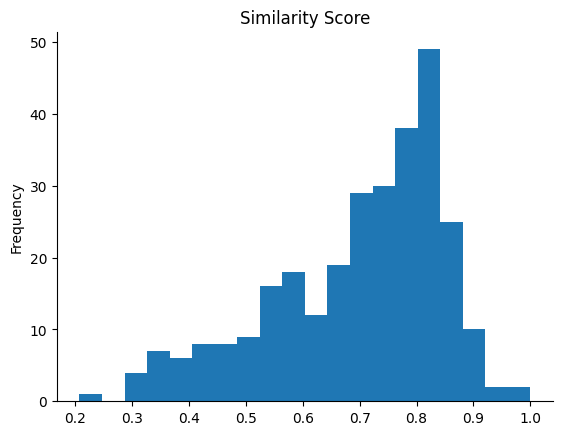

In [ ]:
# Visualize the distribution of similarity scores using a histogram
from matplotlib import pyplot as plt

# Plot the similarity scores using a histogram with 20 bins
results_df['Similarity Score'].plot(kind='hist', bins=20, title='Similarity Score')

# Hide the top and right spines (borders) of the plot for a cleaner appearance
# 'spines' refers to the plot borders, and this line removes the top and right borders
plt.gca().spines[['top', 'right']].set_visible(False)